<a href="https://colab.research.google.com/github/smw9999/deep-learning/blob/main/3_SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소프트맥스 회귀 ( Softmax Regression )

>**목차**
1. 개념정리
3. 원-핫 벡터
3. 실습


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---


<br>

###<center> < 가설 > </center>
###  <center>$f(x)=softmax(xW+b)$</center>

<br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \;J(y, \hat{y})$</center>
### <center> $ =arg \; min \;J(y, f(x))$</center>
### <center> $ =arg \; min \;J(y, softmax(xW+b))$</center>

### **소프트맥스 함수 ( Softmax funtion )**

<br>

### <center> $softmax(x)_k = \frac{1}{\sum_{j=1}^{d}e^{(x_j)}}e(x_k)$

<br>

### <center> $softmax(x) = [\frac{e(x_1)}{\sum_{j=1}^{d}e^{(x_j)}}, \frac{e(x_2)}{\sum_{j=1}^{d}e^{(x_j)}} ... \frac{e(x_d)}{\sum_{j=1}^{d}e^{(x_j)}}]$

* 구현

In [ ]:
def softmax(x):
  y1 = np.array([ np.exp(xi) for xi in x ])
  y2 = y1/np.sum(y1)
  return y2

softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

* 예제
  * $ x_1 = (2,1,1)$
  * $ x_2 = (2,5,3)$
  * $ x_3 = (-1,2,5)$

In [ ]:
x1 = np.array([2,1,1])
print(softmax(x1))

x2 = np.array([2,5,3])
print(softmax(x2))

x3 = np.array([-1,2,5])
print(softmax(x3))

[0.57611688 0.21194156 0.21194156]
[0.04201007 0.84379473 0.1141952 ]
[0.00235563 0.04731416 0.95033021]


### **가설 구현**
###<center>$f(x)=softmax(xW+b)$</center>

In [ ]:
def hypothesis(x,W,b=0):
  return softmax(np.dot(x,W)+b)

### **예제**

|X|
|------|
|-3|
|-2|
|-1|
|0|
|1|
|2|
|3|


* 데이터 정의



In [ ]:
X = np.array([[-3],
     [-2],
     [-1],
     [0],
     [1],
     [2],
     [3]
     ])

X.shape

(7, 1)

* 예측

In [ ]:
W = np.array([[1, 2, 3]])
print(W, W.shape)

for x in X:
  y_pred = hypothesis(x,W)
  print(x, y_pred)

[[1 2 3]] (1, 3)
[-3] [0.95033021 0.04731416 0.00235563]
[-2] [0.86681333 0.11731043 0.01587624]
[-1] [0.66524096 0.24472847 0.09003057]
[0] [0.33333333 0.33333333 0.33333333]
[1] [0.09003057 0.24472847 0.66524096]
[2] [0.01587624 0.11731043 0.86681333]
[3] [0.00235563 0.04731416 0.95033021]


## 2. 원-핫 벡터 (Cross Entropy)
---

|X|Y|
|---|--|
|-3|패배|
|-2|패배|
|-1|패배|
|0|무승부|
|1|무승부|
|2|승리|
|3|승리|


* 데이터 정의



In [ ]:
Y = np.array([0,0,0,1,1,2,2,2])

from tensorflow.keras.utils import to_categorical
Y_onehot = to_categorical(Y, num_classes=3)
print(Y_onehot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]



## 3. 실습
---

### **데이터**
|공부시간|집중도|수면시간|종합성적|합격여부|
|------|---|---|---|---|
|0|1|9|0|불합격|
|1|1|8.5|1.1|불합격|
|2|2|8|2.3|불합격|
|3|4|8|3.0|유예|
|4|3|7|4.4|유예|
|5|5|7.5|5.5|유예|
|6|6|7|6.1|유예|
|7|6|6|7.3|합격|
|8|7|7|8.4|합격|
|9|6|6.5|9.8|합격|

* 데이터 정의

In [ ]:
X = np.array([[0,1,9,0],
      [1,1,8.5,1.1],
      [2,2,8,2.3],
      [3,4,8,3.0],
      [4,3,7,4.4],
      [5,5,7.5,5.5],
      [6,6,7,6.1],
      [7,6,6,7.3],
      [8,7,7,8.4],
      [9,6,6.5,9.8],
     ])

Y = np.array([0,0,0,1,1,1,1,2,2,2])
Y_onehot = to_categorical(Y, num_classes=3)

X.shape, Y_onehot.shape

((10, 4), (10, 3))

* 시각화 

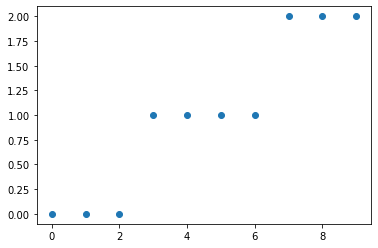

In [ ]:
plt.plot([y for y in Y], marker='o', linestyle='')
plt.show()

###  **모델 생성**

* 케라스를 이용한 모델 구현

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [ ]:
W = model.get_weights()[0]
b = model.get_weights()[1]
print('W',W)
print('b',b)

W [[ 0.7414683   0.5367805   0.7802541 ]
 [ 0.22797012  0.5987828  -0.47069487]
 [ 0.5876609  -0.5473412   0.7392727 ]
 [-0.7855767  -0.72648126  0.23607278]]
b [0. 0. 0.]


* 시각화

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


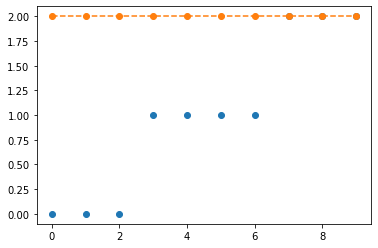

In [ ]:
Y_pred_onehot = model.predict(X)
Y_pred = [ np.argmax(y_pred_onehot) for y_pred_onehot in Y_pred_onehot ]
print(Y_pred)

plt.plot(Y, marker='o', linestyle='')
plt.plot(Y_pred, marker='o', linestyle='--')
plt.show()

### **모델 학습**

* 모델 컴파일

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(learning_rate=0.01),
              metrics=[ 'acc' ])

* 학습 진행

In [ ]:
model.fit(X, Y_onehot, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 401ms/step - loss: 4.7008 - acc: 0.3000
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 4.1415 - acc: 0.3000
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 3.6628 - acc: 0.4000
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 3.2618 - acc: 0.4000
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 2.9178 - acc: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 2.6070 - acc: 0.6000
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 2.3143 - acc: 0.6000
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 2.0355 - acc: 0.6000
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 1.7760 - acc: 0.6000
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.5493 - acc: 0.6000
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 1.371

### **결과**

* 학습 파라미터 확인

In [ ]:
W = model.get_weights()[0]
b = model.get_weights()[1]
print('W',W)
print('b',b)

W [[ 0.43298984  0.55960494  1.0659083 ]
 [-0.10368288  0.7965277  -0.33678672]
 [ 0.8023063   0.3214848  -0.3441994 ]
 [-1.0830497  -0.69208676  0.49915048]]
b [ 0.01456095  0.10600065 -0.1205616 ]


* 예측

In [ ]:
Y_pred_onehot = model.predict(X)
Y_pred = [np.argmax(Y_pred_onehot) for Y_pred_onehot in Y_pred_onehot]
print(Y_pred)

[0, 0, 0, 1, 1, 1, 1, 2, 2, 2]


* 시각화

[0, 0, 0, 1, 1, 1, 1, 2, 2, 2]


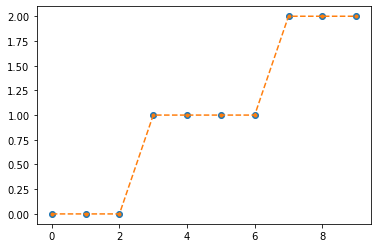

In [ ]:
Y_pred_onehot = model.predict(X)
Y_pred = [ np.argmax(y_pred_onehot) for y_pred_onehot in Y_pred_onehot ]
print(Y_pred)

plt.plot(Y, marker='o', linestyle='')
plt.plot(Y_pred, marker='.', linestyle='--')
plt.show()